In [0]:
#Research references:
#1) Dry/wet cough classification: https://link.springer.com/article/10.1007/s10439-013-0741-6
#2) Pneumonia classification: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6987276
#3) https://espace.library.uq.edu.au/data/UQ_344963/s41943203_phd_submission.pdf?Expires=1585601065&Key-Pair-Id=APKAJKNBJ4MJBJNC6NLQ&Signature=Lnpf6wT8rkozSh9av7U9nGuC7WAH6KuI2Cj3Y7G366gkGlh8D-Ie1Kc~TyBAUu~uMsVltleJcSv3p6TCm6HdFnhpyoTgLcYh6eFfvQwIUqbk1Bf4JZldgB~BDKUOwY1G0pA-HoKjvIAu3avO98SMO35upakm9OEBByd4nC9aXsjKRThd6bTpq1qIuuD9gh1l5FaM6hNRB0c2lCf4Q3adx7C3FW0NMwdWhcuF45A9f~dO3zTWWSQamoo5Otc-PHMMt96TetNcML~jy9ghgJeCPY6DJLUIwQAt03fENBluS~TjTJ17WD~n51xiRofb94fEJHoRHh0d-430LLwr7BX4IA__

In [2]:
!pip install pydub

In [3]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=c30fa5b78c9dfaa86bdfefea78f68c0c507f03d097fdaa1459db02a8a62eb92c
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [4]:
!pip install pysptk

     |████████████████████████████████| 419kB 4.6MB/s 
  Created wheel for pysptk: filename=pysptk-0.1.18-cp36-cp36m-linux_x86_64.whl size=950125 sha256=c5cb8d0fd2db9565ec7ea93eba06e54c80eccaaf2bdf19fb836197b6835fb289
  Stored in directory: /root/.cache/pip/wheels/c7/96/d2/a163240019c59504402fab713af259026af81a99dea943404a
Successfully built pysptk


In [0]:
import numpy as np
import os
#import pywt #wavelets
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.utils import mediainfo
from pydub.playback import play
import matplotlib.pyplot as plt
#import seaborn as sn
import python_speech_features as spe_feats
import pandas as pd
from scipy.stats import kurtosis, skew
from scipy.signal import lfilter
import librosa
import pysptk
import math
import sys
import random
random.seed(1)
#settings
import config


## Reading recordings

In [0]:
all_s=[]
all_label=[]
all_id=[]
all_fs=[]

In [0]:
import sys  
sys.path.insert(0, '/content/config.py') #/content/config.py

In [3]:
#Read wav data set

if config.featExtr_skip is False:
    print("Readings wavs...")

    #only list files in FOLDER_PATH directory
    wav_files = [f for f in os.listdir(config.FOLDER_PATH) if os.path.isfile(os.path.join(config.FOLDER_PATH, f))]
    for file_name in wav_files:
    
        fname_noExt = os.path.splitext(file_name)[0] #file name without extension
    
        #full path file name
        full_fname = config.FOLDER_PATH+file_name
        print(full_fname)
    
        # load audio
        s = AudioSegment.from_wav(full_fname)
        print(full_fname)
        all_s.append(s)
        #sampling rate:
        info = mediainfo(full_fname)
        fs = float(info['sample_rate'])
        all_fs.append(fs)
    
        #get ID of recording
        ID = fname_noExt.split('-')[-2] #for the current type of naming
        #print(file_name)
        #print(ID)
        all_id.append(ID)
    
        #get label
        label = fname_noExt.split('-')[-1] #for the current type of naming
        #print(label)
        all_label.append(label)

Readings wavs...
data/YT_set/edited_wavs/edit_Spring Cold Coughing.-u2KMBD5-oCg-Dry.wav
data/YT_set/edited_wavs/edit_Spring Cold Coughing.-u2KMBD5-oCg-Dry.wav
data/YT_set/edited_wavs/edit_Coughing 14 - After work-1UDFq2InljM-Dry.wav
data/YT_set/edited_wavs/edit_Coughing 14 - After work-1UDFq2InljM-Dry.wav
data/YT_set/edited_wavs/edit_# 30 Chesty and wet cough-d2wkdrScerU-Wet.wav
data/YT_set/edited_wavs/edit_# 30 Chesty and wet cough-d2wkdrScerU-Wet.wav
data/YT_set/edited_wavs/edit_Man Coughing Sound - Wet Cough Sound Effect-q6WsoL3J8U8-Wet.wav
data/YT_set/edited_wavs/edit_Man Coughing Sound - Wet Cough Sound Effect-q6WsoL3J8U8-Wet.wav
data/YT_set/edited_wavs/edit_Dry Afternoon Cough-6LK6yHtIung-Dry.wav
data/YT_set/edited_wavs/edit_Dry Afternoon Cough-6LK6yHtIung-Dry.wav
data/YT_set/edited_wavs/edit_Coughing 51-LkxvBb2VXbs-Dry.wav
data/YT_set/edited_wavs/edit_Coughing 51-LkxvBb2VXbs-Dry.wav
data/YT_set/edited_wavs/edit_Heavy cold and sore throat coughing.-NaOVmYoIjbs-Dry.wav
data/YT_set

In [4]:
len(wav_files) # Total 36 files uploaded 

36

Listening to some of the audios

In [0]:
if config.featExtr_skip is False:
    np.where(np.array(all_label)=='Dry')

In [0]:
if config.featExtr_skip is False:
    np.where(np.array(all_label)=='Wet')

In [0]:
if config.featExtr_skip is False:
    s=all_s[15]
    s

## Feature extraction

In [0]:
!pip install git+https://github.com/r9y9/pysptk

  Cloning https://github.com/r9y9/pysptk to /tmp/pip-req-build-6u74m302
  Running command git clone -q https://github.com/r9y9/pysptk /tmp/pip-req-build-6u74m302
  Running command git submodule update --init --recursive -q
  Created wheel for pysptk: filename=pysptk-0.1.19+dbc194c-cp36-cp36m-linux_x86_64.whl size=951981 sha256=67fb69d07f780bfa92ef3ec6cf2c20020c8ef7e5dc2636e0a12aad767abfd0c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-3pwu12so/wheels/2a/28/31/a8ae9718b5bd5b21d46703b1d34d3c87f4cf4e604e2413607b
Successfully built pysptk
  Found existing installation: pysptk 0.1.18
    Uninstalling pysptk-0.1.18:
      Successfully uninstalled pysptk-0.1.18


In [7]:
import numpy as np
np.shape(all_label)


(36,)

In [7]:
import featureExtractionFunctions as featExtrLib
import pysptk
if config.featExtr_skip is False:

    feats = featExtrLib.feature_extraction_Step(all_s,all_id,all_label)
    
       
#Lenght of all_s, all_id and all_label must be the same
       #Lenght is 36, of a ll arguments 

High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass 

In [0]:
feats.shape

(4470, 25)

## Load  (or store) features 

In [0]:
feats_fname = 'feats_df.pkl'

if config.featExtr_skip is False:
    #Store feature df
    feats.to_pickle(feats_fname)
else:
    #Load feature df
    feats = pd.read_pickle(feats_fname)

## Pre-processing of features

In [0]:
feats2 = featExtrLib.processingNaNvalues(feats)

In [0]:
label_dict = featExtrLib.createLabelDict_addLabel2df(feats2)
mean_std_feats = featExtrLib.frame_mean_std_chunk_modeling (feats2,label_dict)

In [11]:
mean_std_feats.shape

(465, 49)

## Model training

In [0]:
X_train = mean_std_feats.drop(['label','Id','subIdx'], 1).copy()
y_train =  mean_std_feats['label'].copy()

ID_train = mean_std_feats['Id']

#ID_train.size

In [13]:
y_train.isnull().sum()

0

In [14]:
X_train.isnull().sum()

kurt_m           0
logEnergy_m      0
zcr_m            0
F0_m             0
skewness_m       0
entropy_m        0
mfcc_0_m         0
mfcc_1_m         0
mfcc_2_m         0
mfcc_3_m         0
mfcc_4_m         0
mfcc_5_m         0
mfcc_6_m         0
mfcc_7_m         0
mfcc_8_m         0
mfcc_9_m         0
mfcc_10_m        0
mfcc_11_m        0
mfcc_12_m        0
F1_m             0
F2_m             0
F3_m             0
F4_m             0
kurt_std         0
logEnergy_std    0
zcr_std          0
F0_std           0
skewness_std     0
entropy_std      0
mfcc_0_std       0
mfcc_1_std       0
mfcc_2_std       0
mfcc_3_std       0
mfcc_4_std       0
mfcc_5_std       0
mfcc_6_std       0
mfcc_7_std       0
mfcc_8_std       0
mfcc_9_std       0
mfcc_10_std      0
mfcc_11_std      0
mfcc_12_std      0
F1_std           0
F2_std           0
F3_std           0
F4_std           0
dtype: int64

In [15]:
X_train.shape

(465, 46)

In [16]:
y_train.shape

(465,)

In [0]:
import modelTrainingFunctions as modelTrainLib

pred_probs = modelTrainLib.modelTraining(X_train,y_train,ID_train)

In [0]:
mean_pred_probs = modelTrainLib.get_predClass_per_audio(pred_probs, label_dict)

## Evaluation

In [15]:
import classifEvaluationFunctions as evalLib
evalLib.evaluation_Step(mean_pred_probs)
    

Scores:
Accuracy: 0.750000
Precision: 0.750000
F1-score: 0.748252
Recall: 0.757143

Confusion matrix
pred_class  Dry  Wet  All
label                    
Dry          12    3   15
Wet           6   15   21
All          18   18   36


In [45]:
#Test data set

mean_pred_probs

,ID,Dry,Wet,pred_class,label
0,1UDFq2InljM,0.600415,0.399585,Dry,Dry
1,4k0ziD0j5BI,0.518717,0.481283,Dry,Wet
2,5905FxXz9dI,0.659030,0.340970,Dry,Wet
3,6LK6yHtIung,0.158980,0.841020,Wet,Dry
4,7Ez5Wc_esBg,0.881907,0.118093,Dry,Dry
5,A5s2ZgwQ1VM,0.526694,0.473306,Dry,Dry
6,AQOeIVbhFm4,0.543620,0.456380,Dry,Dry
7,CTSLdNxN1cc,0.525691,0.474309,Dry,Wet
8,CsDXlt7Ei1c,0.682077,0.317923,Dry,Wet
9,DYfjPnty2Ho,0.249992,0.750008,Wet,Wet


In [23]:
# y_test.shape - (36,)
#X_test.shape - (36, 2)

(36, 2)

In [22]:
#X_train.shape -(465, 46) 
#y_train.shape -(465,)

(465,)

In [19]:
X_train # 46 columns , X_test also should be with 46 columns

,kurt_m,logEnergy_m,zcr_m,F0_m,skewness_m,entropy_m,mfcc_0_m,mfcc_1_m,mfcc_2_m,mfcc_3_m,mfcc_4_m,mfcc_5_m,mfcc_6_m,mfcc_7_m,mfcc_8_m,mfcc_9_m,mfcc_10_m,mfcc_11_m,mfcc_12_m,F1_m,F2_m,F3_m,F4_m,kurt_std,logEnergy_std,zcr_std,F0_std,skewness_std,entropy_std,mfcc_0_std,mfcc_1_std,mfcc_2_std,mfcc_3_std,mfcc_4_std,mfcc_5_std,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,F1_std,F2_std,F3_std,F4_std
0,2.893929,1.531556,0.585213,0.000000,0.097264,8.637856,9.701681,-45.561334,-8.085834,-14.773934,-16.527605,-7.891827,-10.029310,-10.951070,-7.588179,-12.410635,-9.072450,0.549025,3.919405,3.919405,3.919405,3.919405,3.919405,1.086844,1.627957,0.078963,0.000000,0.124651,8.602325e-03,3.578747,2.446531,4.636264,4.085897,17.836598,9.019505,8.057826,7.273571,12.029057,6.399534,7.872096,10.094882,6.587038,6.587038,6.587038,6.587038,6.587038
1,2.110001,5.906655,0.483208,0.000000,-0.049947,8.643856,19.534739,-49.665901,-9.461110,-13.372171,-40.679710,-11.037811,11.707983,-3.037416,9.965036,14.397132,-2.681665,13.230799,-19.078882,-19.078882,-19.078882,-19.078882,-19.078882,0.671718,0.499296,0.026519,0.000000,0.203079,1.776357e-15,1.224653,2.671494,7.118032,7.344973,7.279418,7.988106,8.525701,7.152483,8.980078,16.508643,9.719759,7.107096,17.486749,17.486749,17.486749,17.486749,17.486749
2,1.625414,5.475906,0.387469,180.043884,0.057277,8.643856,18.122213,-46.283128,-19.074089,-11.716652,-25.137202,-26.304297,13.640837,-3.882753,-15.798665,20.270660,11.864468,9.217583,-13.562714,-13.562714,-13.562714,-13.562714,-13.562714,1.130188,0.406858,0.077526,119.211678,0.333425,1.776357e-15,1.002446,5.713889,4.876074,7.828810,11.156722,14.230227,14.312041,24.112487,7.460043,16.469782,13.710701,16.333688,14.590719,14.590719,14.590719,14.590719,14.590719
3,4.231469,4.748404,0.575439,0.000000,0.164693,8.643856,17.010254,-52.916741,-14.130535,-4.793562,-18.516843,-31.100496,29.860414,3.759305,-4.935491,-19.819752,-4.741783,11.141441,4.562183,4.562183,4.562183,4.562183,4.562183,3.581900,0.863320,0.060558,0.000000,0.189040,1.776357e-15,2.041497,4.396982,7.533800,7.278805,17.454729,9.628970,6.913630,15.107939,7.119137,9.673574,8.464546,11.736144,6.732657,6.732657,6.732657,6.732657,6.732657
4,3.037410,3.017375,0.272467,0.000000,0.214881,8.019268,11.882409,-29.378689,-4.265647,-29.415736,-31.260075,-22.673140,3.662314,-17.311716,-32.599168,-41.066213,-15.725852,3.362531,1.980638,1.980638,1.980638,1.980638,1.980638,1.878642,1.094042,0.107879,0.000000,0.371560,1.529923e+00,2.305782,7.004935,7.257115,9.575734,10.075674,15.373393,12.486259,19.026767,15.917041,12.204905,8.732682,6.397854,8.534331,8.534331,8.534331,8.534331,8.534331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,0.800811,4.905811,0.864411,222.215424,0.001723,8.643856,17.863415,-26.596485,2.660818,-46.366693,23.399731,-16.795685,10.677427,-18.122992,13.827505,-36.602839,-32.744914,-23.263752,0.926446,0.926446,0.926446,0.926446,0.926446,0.401067,0.837759,0.049880,0.019365,0.095485,1.776357e-15,1.933778,1.918197,6.209029,7.808929,7.901765,5.111972,5.176447,8.633568,4.435257,8.411184,7.968359,5.770466,3.765185,3.765185,3.765185,3.765185,3.765185
461,4.584198,4.995416,0.727569,115.371544,-0.039614,8.643856,17.852251,-38.809974,-6.841775,-25.945151,6.594260,-13.457908,-3.304249,-20.911427,-17.757630,-31.881328,-14.404394,-9.531712,6.228125,6.228125,6.228125,6.228125,6.228125,3.744487,0.822658,0.113232,115.823547,0.231049,1.776357e-15,1.794743,4.732166,8.789997,13.486709,8.171508,8.280521,7.408895,8.567133,16.835769,10.297329,8.363524,8.321366,9.031401,9.031401,9.031401,9.031401,9.031401
462,4.176644,4.375044,0.632331,0.000000,0.072479,8.643856,16.323905,-46.395477,-13.004949,-16.123185,-16.902496,-22.846415,-13.414194,-9.839848,-14.010959,-25.315674,-15.916853,-14.685377,0.637530,0.637530,0.637530,0.637530,0.637530,1.594510,0.379344,0.073

In [20]:
y_train #Need to encode this 

0      Dry
1      Dry
2      Dry
3      Dry
4      Dry
      ... 
460    Dry
461    Dry
462    Dry
463    Dry
464    Dry
Name: label, Length: 465, dtype: object

In [16]:
y_train = y_train.astype('category')
y_train = y_train.cat.codes
y_train.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
dtype: int8

In [20]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 29kB/s 
     |████████████████████████████████| 3.2MB 33.8MB/s 
     |████████████████████████████████| 491kB 49.4MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [17]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
import random
random.seed(1)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
#Split X_train and y_train for training a sequential model and prediction 

# split the dataset 
from sklearn.model_selection import train_test_split 
xx_train, xx_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size=0.10, random_state = 127)



In [0]:
#https://towardsdatascience.com/getting-started-on-deep-learning-for-audio-data-667d9aa76a33

In [0]:
#Modification for Capturing sequence in audio data
import numpy as np
np.random.seed(1337)
from keras import Sequential
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization,CuDNNLSTM, GRU, CuDNNGRU, Embedding, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from sklearn.model_selection import KFold, cross_val_score, train_test_split




In [0]:
model = Sequential()
model.add(BatchNormalization(momentum=0.98,input_shape=(418, 46)))
model.add(Bidirectional(CuDNNGRU(128, return_sequences = True)))
model.add(Flatten())
model.add(Dense(1,input_dim=46,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 418, 46)           184       
_________________________________________________________________
bidirectional_3 (Bidirection (None, 418, 256)          135168    
_________________________________________________________________
flatten_3 (Flatten)          (None, 107008)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 107009    
Total params: 242,361
Trainable params: 242,269
Non-trainable params: 92
_________________________________________________________________


In [0]:
num_labels = yy_train.shape[0]
filter_size = 2
import keras

def build_model_graph(input_shape=(465, 46)):
    # define the keras model
    model = Sequential()
    #model.add(BatchNormalization(momentum=0.98))
    model.add(Dense(12, input_dim=46, activation='relu',kernel_initializer=keras.initializers.glorot_uniform(seed=66)))
    #model.add(Dense(8, activation='relu'))
    #model.add(Bidirectional(CuDNNGRU(128, return_sequences = True)))
    #model.add(Flatten())
    model.add(Dense(1, activation='sigmoid',kernel_initializer=keras.initializers.glorot_uniform(seed=66)))
    # Compile the model
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

In [34]:
model = build_model_graph()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                564       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [35]:
num_epochs = 100
num_batch_size = 25
history = model.fit(xx_train, yy_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(xx_test,yy_test), verbose=0,shuffle=False)




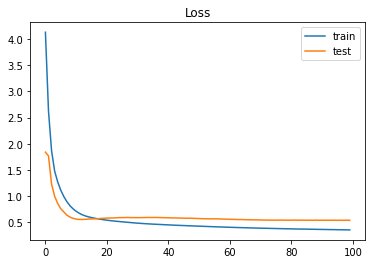

In [21]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

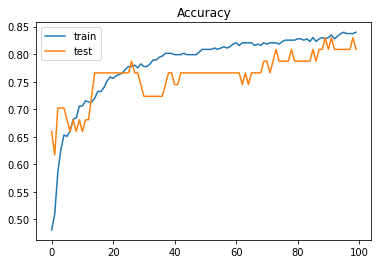

In [36]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [37]:
# Evaluating the model on the training and testing set
score = model.evaluate(xx_train, yy_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(xx_test, yy_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))


#Training Accuracy: 95.97%
#Testing Accuracy: 76.34%


#Training Accuracy: 98.77%
#Testing Accuracy: 72.14%


#Training Accuracy: 92.58%
#Testing Accuracy: 85.11%

#Training Accuracy: 84.45%
#Testing Accuracy: 82.98%

#Training Accuracy: 82.54%
#Testing Accuracy: 74.47%

#Training Accuracy: 83.73%
#Testing Accuracy: 80.85%


#Training Accuracy: 84.45%
#Testing Accuracy: 82.98%

#Training Accuracy: 84.21%
#Testing Accuracy: 82.98%


Training Accuracy: 84.21%
Testing Accuracy: 80.85%


Fine tune the parameters to improve classification accuracy - if not then refine the features used - perhaps add weightage somewhere - aim for atleast 80% accuracy 

Generation 15 - Current best internal CV score: 0.7109589041095891

Best pipeline: DecisionTreeClassifier(PolynomialFeatures(CombineDFs(input_matrix, input_matrix), degree=2, include_bias=False, interaction_only=False), criterion=entropy, max_depth=3, min_samples_leaf=18, min_samples_split=16)

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=15,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

Sequence Modeling 


hi, i just wanted to mention, about the modeling of features using sequence models. the current super basic way that I used is modeling chunks of X consecutive frames (so far I used 10frames) computing their mean and standard deviation.
3:05
You can use maybe this function as model. It is within the featureExtractionFunctions.py script




